# Emotion Detection

## Importing Libraries

In [21]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import random
import os
import scipy
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow",tf.__version__)

Tensorflow 2.15.0


## Exploring Dataset

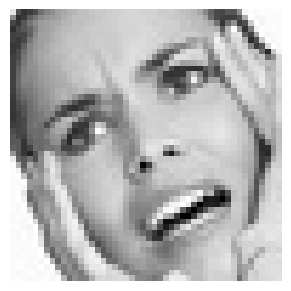

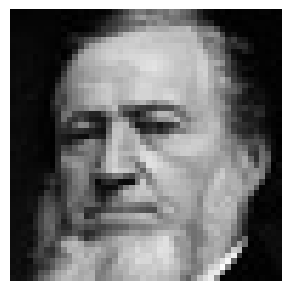

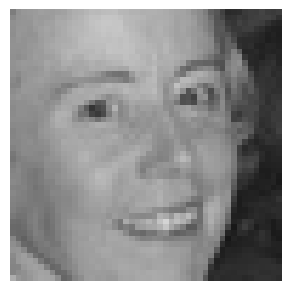

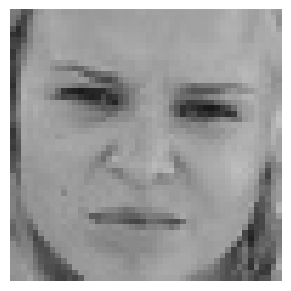

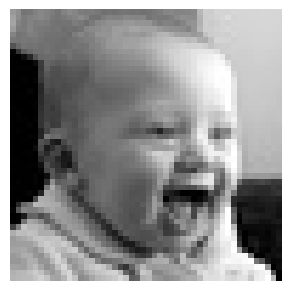

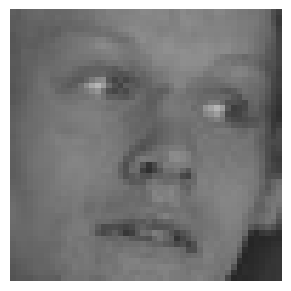

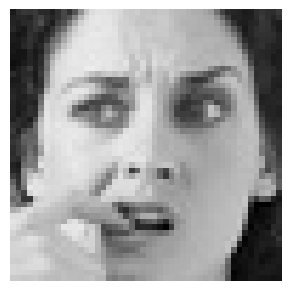

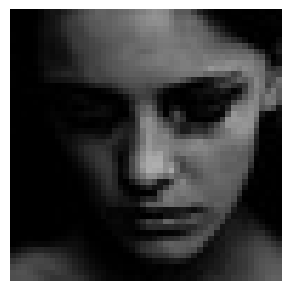

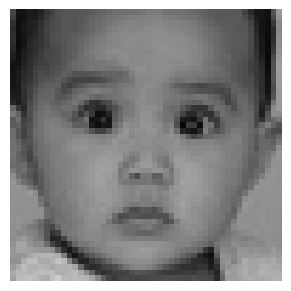

In [22]:
images= glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')
    

## Preparing Data for Training

In [23]:
img_size=48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                     target_size= (img_size,img_size),
                                                     color_mode = "grayscale", 
                                                     batch_size = batch_size,
                                                     class_mode ="categorical",
                                                     shuffle = True)

Found 26466 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


## Defining Model

In [24]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model

def convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

def model_fer(input_shape):
    inputs = Input(shape=input_shape)

    conv1 = convolution(inputs, 32, (3, 3))
    conv2 = convolution(conv1, 64, (5, 5))
    conv3 = convolution(conv2, 128, (3, 3))

    flatten_layer = Flatten()(conv3)
    dense1 = Dense_f(flatten_layer, 256)

    output = Dense(7, activation="softmax")(dense1)

    model = Model(inputs=inputs, outputs=output)
    return model

model = model_fer((48, 48, 1))
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0   

## Intialising the model

In [25]:
epochs = 15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only = True, node ='max', verbose =1)

callbacks = [checkpoint]


## Training the model

In [26]:
# Compile the model with an optimizer and a loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
print(scipy.__version__)

1.12.0


In [28]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15
413/413 [==============================] - ETA: 0s - loss: 1.6309 - accuracy: 0.3887
Epoch 1: saving model to model_weights.h5
413/413 [==============================] - 100s 236ms/step - loss: 1.6309 - accuracy: 0.3887
Epoch 2/15
413/413 [==============================] - ETA: 0s - loss: 1.3454 - accuracy: 0.4952
Epoch 2: saving model to model_weights.h5
413/413 [==============================] - 130s 315ms/step - loss: 1.3454 - accuracy: 0.4952
Epoch 3/15
413/413 [==============================] - ETA: 0s - loss: 1.2310 - accuracy: 0.5366
Epoch 3: saving model to model_weights.h5
413/413 [==============================] - 95s 229ms/step - loss: 1.2310 - accuracy: 0.5366
Epoch 4/15
413/413 [==============================] - ETA: 0s - loss: 1.1602 - accuracy: 0.5640
Epoch 4: saving model to model_weights.h5
413/413 [==============================] - 87s 211ms/step - loss: 1.1602 - accuracy: 0.5640
Epoch 5/15
413/413 [==============================] - ETA: 0s - loss: 1.1078 -

## Model Evaluation

In [30]:
model.evaluate(validation_generator)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

KeyError: 'val_loss'

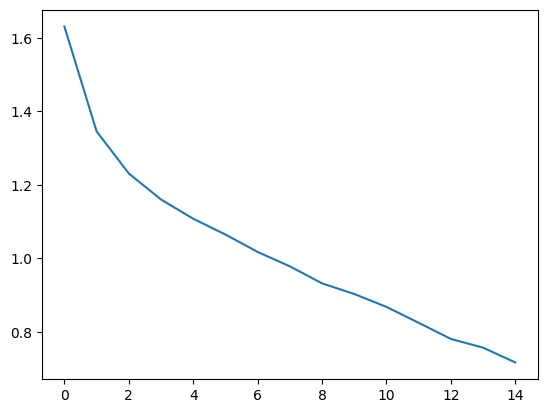

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0.0,hspace=0.25,wspace=0.35)

KeyError: 'val_accuracy'

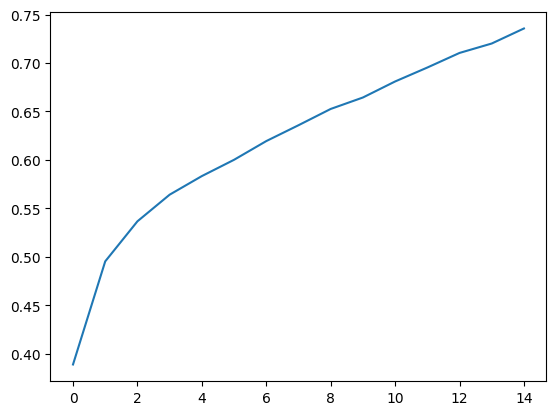

In [32]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95, left=0.0,hspace=0.25,wspace=0.35)

## Saving Model

In [33]:
model_json = model.to_json() 
with open("model_a.json","w") as json_file: 
    json_file.write(model_json)